# Lecture 7 - Git Branching and Merging, CI/CD

## Contents

1. [Git Branching and Merging](#git)
2. [Continuous Integration (Automated Testing)](#ci)
3. [Continuous Deployment (Automated Documentation)](#cd)
4. [Conclusion](#conclusion)
5. [Further Reading](#further-reading)

## 1. Git Branching and Merging <a class="anchor" id="git"></a>

- Branches are powerful tools which allow multiple versions of a repository to be developed in parallel and later recombined.


- Typically, a repository will have a **mainline branch** or **trunk** (usually called `master` or `main`) which is considered stable and correct.


- Development is done on so-called **feature branches**, which originate from another branch, most often the trunk. In this way, the trunk remains unaffected as work is carried out on the feature branch.


- Once a new feature is complete and confirmed correct, the feature branch is then **merged** into the trunk.

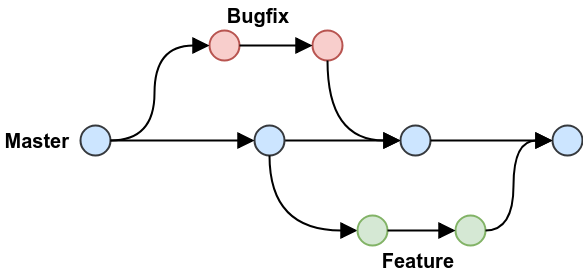
[Source](https://docs.wavemaker.com/learn/blog/2021/09/17/git-branching-strategy)

- Git's lightweight branching model is incredibly useful for **ad-hoc experimentation**. Got an idea for how to make your code better/faster/more elegant? Just create a new branch and try it out, safe in the knowledge that your `main` branch remains unaffected. If your experiment works, great, merge it! If it doesn't, simply delete the branch and move on.

### 1.1. Git Branches

- In Git, **a branch is simply a pointer to a commit**.


- Suppose we begin with one branch, called `master`, and we want to create a new branch, called `testing`, in order to make some experimental changes. We do `git branch testing` and our repository now looks something like this:

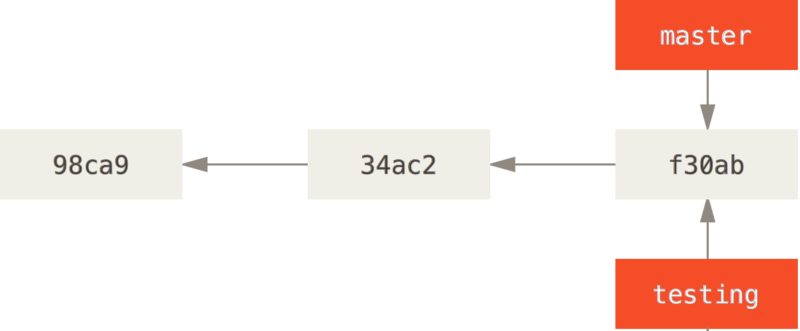
[Source](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell)

- Both of these branches point to the same commit, meaning they are  currently identical. **But they are free to diverge**. 


- Suppose we make some changes on the `testing` branch and commit them. Now our repository looks like this:

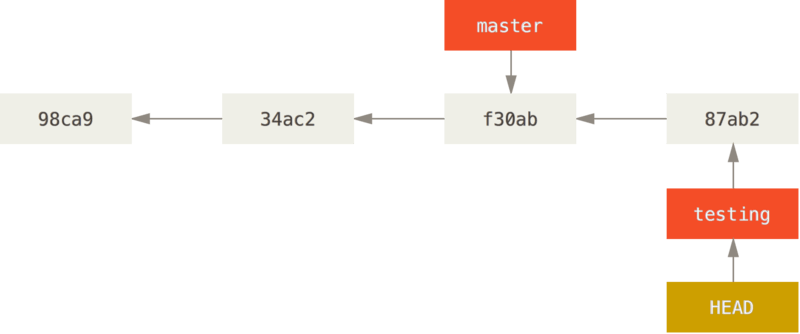
[Source](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell)

- The master branch still points to the same commit as before; it is completely unchanged and unaffected by work happening on the `testing` branch.


- The testing branch now points to the new commit which contains our experimental changes.


- Note also the pointer called `HEAD`. This tells us what branch we are on currently, in this case `testing`.

### 1.2. Merging

- Suppose you succesfully complete some work on the `testing` branch and want to incorporate those changes into the trunk. That is, you want to merge the changes you made on the `testing` branch into the `master` branch.


- Suppose also that the `master` branch has changed since you created the branch. The situation looks something like this (where the branch `iss53` in the image takes the place of our `testing` branch):

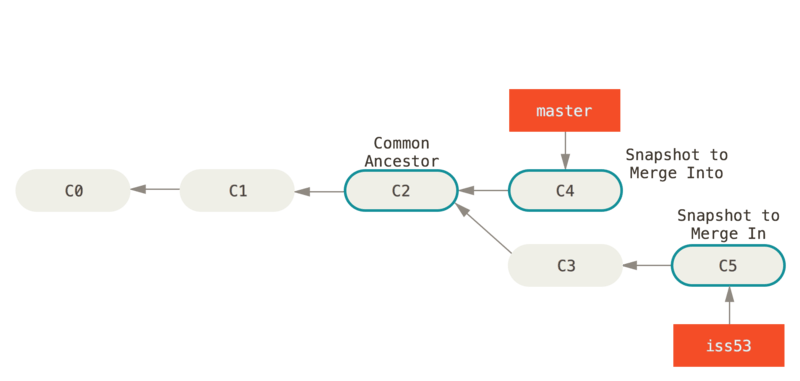
[Source](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell)

- To merge our changes, we would simply change to the `master` branch and do `git merge testing`.


- In response to this command, Git will perform a **three-way merge**, meaning that it compares:  

    1. The branch being merged in.
    2. The branch being merged into.
    3. Their common ancestor.
    
and figures out how to combine them.


- After the merge, our repository looks like:

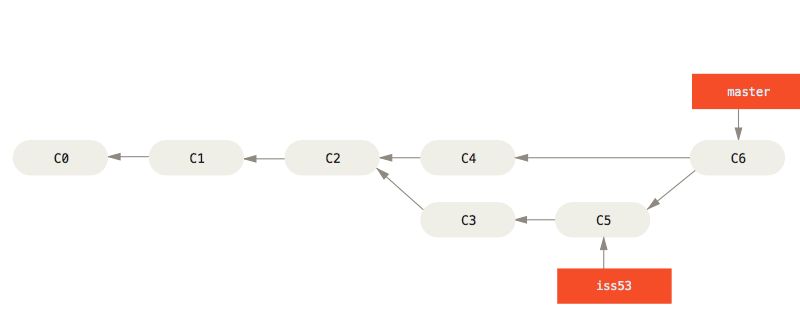
[Source](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell)

where the commit `C6` is a **merge commit**, combining the changes from the two branches.


- If you're done with the `testing` branch, you're now free to delete it, as the code has been incorporated into `master`.

### 1.3. Git Commands for Branching and Merging

#### 1.3.1. List Branches

- To list all of the branches in the current repository, do:

`git branch`

#### 1.3.2. Create a New Branch

- To create a new branch, do:

`git branch <new-branch-name>`

#### 1.3.3. Switch Branches

- To switch to a different branch, do:

`git checkout <branch-to-checkout>`

- Note that we very often want to create a branch and immediately switch to that branch. In that case use the `-b` flag with `git checkout`:

`git checkout -b <new-branch-name>`

- Another useful shortcut is:

`git checkout -`

which switches to the last branch you were on.

#### 1.3.4. Delete a Branch

- To delete a branch, do:

`git branch -d <branch-to-delete>`

#### 1.3.4. Push Changes to GitHub

- Once you've comitted your changes on your local branch, to add those changes to your upstream (GitHub) repository, just do:


`git push`

#### 1.3.5. Get Changes from GitHub
- Suppose there are changes on a branch in a remote repository (i.e. GitHub) which you don't have in your equivalent local branch. This often happens when a collaborator has merged changes into the trunk, for example.


- To get those changes from GitHub and merge them into your equivalent local branch, change to that branch and do:

`git pull`


- This is equivalent to the following two commands, performed sequentially:

`git fetch`  
`git merge`

and you are encouraged to look this up in the [documentation](https://git-scm.com/book/en/v2/Git-Branching-Remote-Branches).

## 2. Continuous Integration <a class="anchor" id="ci"></a>

- Continuous integration (CI) is a software development practice where developers regularly (~daily) merge their code changes into a central trunk, for example, the `main` branch on a central GitHub repository.


- One of the main reasons for practising CI is to avoid conflicting changes when multiple developers are working on the same set of files. These are called [merge conflicts](https://git-scm.com/book/en/v2/Git-Branching-Basic-Branching-and-Merging#_basic_merge_conflicts).


- The longer a feature branch exists without being merged into the trunk, the more likely it is that there will be  nasty merge conflicts, hence the value of CI. This is especially true for large projects with many developers, and is one reason why CI is widely adopted as a best practice in software development.


- Even if you're the only person working on a project, CI is still a valuable tool:  
    - Regularly merging your code into `main` forces you to keep your code changes small and self-contained, meaning bugs can be quickly identified and rectified or reversed.
    - Automated testing allows you to quickly identify issues with your code.

### 2.1. Automated Testing
- An essential feature of CI, and the one we'll focus on today, is automated testing.


- Last week, you learned how to [test your code in Julia](https://docs.julialang.org/en/v1/stdlib/Test/). Writing comprehensive unit tests, and automating them using CI tools, will allow you to rapidly develop your Julia package without fear of breaking existing functionality. This in turn gives you great freedom to iterate and experiment with your code.


- What do we actually mean by automating our unit tests? In this instance, we mean that everytime we push our code changes to GitHub, the tests in our project will be automatically run against our source code. All of this happens on GitHub's servers.


- There are many CI tools you could integrate with GitHub in order to automate testing of your Julia packages. Some well-known examples are Jenkins, CircleCI, Travis CI, and GitHub Actions. We'll use [GitHub Actions](https://github.com/features/actions) because it is incredibly easy to integrate with our GitHub repositories.


- The easiest way to set up GitHub Actions in your Julia projects is to simply include it as a plugin in your [PkgTemplates.jl](https://juliaci.github.io/PkgTemplates.jl/stable/user/) templates. For example:

In [5]:
using PkgTemplates

template = Template(
    user = "your-GitHub-username" # is required because of the GitHubActions CI below 
    julia = v"1.9.0", # we restrict tests (and the package) to the most current Julia version
    plugins = [
        GitHubActions(),  # See PkgTemplates docs for all of the configuration options
    ],
);

- Along with all of the usual files for your Julia package, this will also create a file `.github/workflows/CI.yml` which contains the config GitHub needs to automatically run your tests.


- The file looks like this:

```yaml
name: CI
on:
  push:
    branches:
      - main
    tags: ['*']
  pull_request:
  workflow_dispatch:
concurrency:
  # Skip intermediate builds: always.
  # Cancel intermediate builds: only if it is a pull request build.
  group: ${{ github.workflow }}-${{ github.ref }}
  cancel-in-progress: ${{ startsWith(github.ref, 'refs/pull/') }}
jobs:
  test:
    name: Julia ${{ matrix.version }} - ${{ matrix.os }} - ${{ matrix.arch }} - ${{ github.event_name }}
    runs-on: ${{ matrix.os }}
    strategy:
      fail-fast: false
      matrix:
        version:
          - '1.11'
          - 'nightly'
        os:
          - ubuntu-latest
        arch:
          - x64
    steps:
      - uses: actions/checkout@v4
      - uses: julia-actions/setup-julia@v2
        with:
          version: ${{ matrix.version }}
          arch: ${{ matrix.arch }}
      - uses: julia-actions/cache@v2
      - uses: julia-actions/julia-buildpkg@v1
      - uses: julia-actions/julia-runtest@v1
```

- We will demonstrate this by adding CI and automated tests to our repository [Exercise6.jl](https://github.com/maximilian-gelbrecht/Exercise6.jl) containing the solution to the last exercise.
- In case you use any unregesitered packages in your module, make sure you add a `[sources]` tag with the repository address in your `Project.toml` for every unregesitered packages, as explained [here](https://pkgdocs.julialang.org/v1/toml-files/#The-%5Bsources%5D-section)

## 2. Continuous Delivery and Continuous Deployment (CD) <a class="anchor" id="cd"></a>

- Two concepts closely related to continuous integration are continuous delivery and continuous deployment. In fact, you will typically hear developers talking about "CI/CD" rather than just CI or CD in isolation.


- Continuous delivery refers to the practice where engineers regularly deliver software, which is then deployed periodically in small releases, typically on a short cycle (~week).


- Continuous deployment is similar to continuous delivery, except that the deployment process is also fully automated and occurs in realtime.  


- Since the software we are writing as scientists does not typically provide a service, in the sense of a traditional client-server model, deployment in general is well beyond the scope of this course. However, one thing we can and should deploy (continuously) is documentation!

### 2.1. A GitHub Actions CD Pipeline for Hosting Your Documentation on GitHub Pages <a class="anchor" id="pages"></a>

- [GitHub Pages](https://pages.github.com/) allows you to host the documentation of your project on the internet for free. 


- Not only that, you can also use [GitHub Actions](https://github.com/features/actions) to set up a continuous deployment pipeline to automatically keep your documentation up to date with changes in your repository.


#### Step-by-Step Guide


1a. First, add the `deploydocs()` command to your `make.jl` file. It should now look something like this:

```julia
using Documenter, Exercise6

makedocs(sitename="Exercise6.jl Documentation")

deploydocs(
    repo = "github.com/your-GitHub-username/Exercise6.jl.git",
)

```

1b. Alternatively, you can let [PkgTemplates.jl](https://juliaci.github.io/PkgTemplates.jl/stable/user/) take care of this for you by adding the [Documenter plugin](https://juliaci.github.io/PkgTemplates.jl/stable/user/#PkgTemplates.Documenter) to your template.

In [ ]:
using PkgTemplates

template = Template(
    user = "your-GitHub-username", # is required because of the GitHubActions CI below 
    julia = v"1.9.0",
    plugins = [
        GitHubActions(),
        Documenter{GitHubActions}(),
    ],
);

2. Then, create a new workflow configuration file in your repo called `.github/workflows/documentation.yml` with the following contents:

```yaml
name: Documentation

on:
  push:
    branches:
      - main

jobs:
  build:
    permissions:
      contents: write
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v4
      - uses: julia-actions/setup-julia@v1
      - name: Install dependencies
        run: julia --project=docs/ -e 'using Pkg; Pkg.develop(PackageSpec(path=pwd())); Pkg.instantiate()'
      - name: Build and deploy
        env:
          GITHUB_TOKEN: ${{ secrets.GITHUB_TOKEN }}
        run: julia --project=docs/ docs/make.jl
```

Based on this file, every time you push to your repository's `main` branch, your documentation will be automatically built and committed to the branch `gh-pages` (if this branch doesn't already exist, it will be created).


3. Commit these changes and push them to GitHub. Verify that the GitHub Actions job has completed successfully and the docs have been pushed to the `gh-pages` branch.


4. To publish your documentation to the web using GitHub Pages, go to your repository's settings and navigate to the section called "Pages". There, select `gh-pages` as the branch for your GitHub Pages site. After a few minutes, you should be able to view your documentation using the link provided. 


5. Now, everytime you commit a change to your documentation, it will be automatically built *and* deployed!

## 4. Conclusion <a class="anchor" id="conclusion"></a>

- The tools we've used in this lecture - Git branches and CI/CD - are ubiquitous best practices in professional software development. There's a good reason for that: they massively enhance the productivity of developers.


- Used properly, these tools can also massively enhance the productivity of scientists!


- As well as your expertise in the Julia programming language itself, you now have everything you need to start developing high quality Julia packages:  

    1. How to create a well-structured Julia project using [PkgTemplates.jl](https://juliaci.github.io/PkgTemplates.jl/stable/user/).
    2. How to manage your programming environment using [Pkg.jl](https://pkgdocs.julialang.org/v1/).
    3. How to write tests for your project and automate them using [GitHub Actions](https://github.com/features/actions).
    4. How to document your project using [Documenter.jl](https://documenter.juliadocs.org/stable/).
    5. How to practise version control using [Git](https://git-scm.com/) and [GitHub](https://github.com/).

## 5. Further Reading <a class="anchor" id="further-reading"></a>

1. Git Branching and Merging  
    a. [Git book](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell)  
    b. [Git docs](https://git-scm.com/docs/git-branch)  
    c. [Learn Git Branching (interactive tutorial)](https://learngitbranching.js.org/)  
    d. [GitHub docs](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/about-branches)
2. CI/CD  
    a. [CI/CD (Wikipedia)](https://en.wikipedia.org/wiki/CI/CD)  
    b. [GitHub Actions](https://github.com/features/actions)   
    c. [Julia CI](https://github.com/JuliaCI)  
    d. [Julia Documentation Guidelines](https://docs.julialang.org/en/v1/manual/documentation/)  
    e. [Documenter.jl Package Guide](https://juliadocs.github.io/Documenter.jl/stable/man/guide/)  